### Download Graphviz from: https://www.graphviz.org/download/

In [ ]:
!pip install pandas
!pip install nltk
!pip install wordcloud
!pip install mplcursors
!pip install seaborn
!pip install graphviz
!pip install wordtree
!pip install textblob
!pip install spacy
!python -m spacy download en_core_web_sm


^C


In [1]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import mplcursors
import matplotlib.image as mpimg
import wordtree
import os
import matplotlib
import re
import spacy
from textblob import TextBlob, Word

nltk.download(['punkt','stopwords','wordnet','omw-1.4','averaged_perceptron_tagger'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\opedneka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\opedneka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\opedneka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\opedneka\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\opedneka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Replace below graphvizPath variable with the graphviz location on your system. Graphviz is installed with the first cell block above

In [5]:
graphvizPath = "C:\Program Files\Graphviz\bin"
os.environ["PATH"] += os.pathsep + graphvizPath

### Loading data

In [6]:
with open('input.txt') as f:
    lines = [line.strip() for line in f.readlines() if line!='\n']
lines

["Smartphones have become an integral part of our lives, changing the way we communicate, access information, and entertain ourselves. These devices have come a long way since their inception, with the first smartphone introduced in 1992. However, it wasn't until the release of the iPhone in 2007 that smartphones became widely popular and sparked a technological revolution.",
 'One of the most significant features of smartphones is their ability to connect people from all over the world. With instant messaging, video calls, and social media, smartphones have made it easier than ever before to stay in touch with friends and family. These devices have also made it possible to work remotely and stay connected to colleagues no matter where they are.',
 'Smartphones have also transformed the way we access information. With the internet at our fingertips, we can easily search for answers to any question we have. This has made learning and research more accessible than ever before. Additional

### Data Preprocessing

Tokenization: We will break down sentences into single words (tokens) since we would be using words for tasks in the future. To do so, we used the word tokenizer available in nltk

In [7]:
data = [word_tokenize(sent) for sent in lines]
print(data[0])

['Smartphones', 'have', 'become', 'an', 'integral', 'part', 'of', 'our', 'lives', ',', 'changing', 'the', 'way', 'we', 'communicate', ',', 'access', 'information', ',', 'and', 'entertain', 'ourselves', '.', 'These', 'devices', 'have', 'come', 'a', 'long', 'way', 'since', 'their', 'inception', ',', 'with', 'the', 'first', 'smartphone', 'introduced', 'in', '1992', '.', 'However', ',', 'it', 'was', "n't", 'until', 'the', 'release', 'of', 'the', 'iPhone', 'in', '2007', 'that', 'smartphones', 'became', 'widely', 'popular', 'and', 'sparked', 'a', 'technological', 'revolution', '.']


Make lowercase and remove punctuation: 
1. We remove irrelevant characters like punctuations. To do so, we check if the word is alphanumeric or not thus using only words and omitting punctuations.
2. To remove redundancy we make the words lowercase so words like "DeviCEs" and "devices" are considered to be same and redundancy is removed. 

In [8]:
data_processed=[[word.lower() for word in sent if word.isalpha()] for sent in data]
print(data_processed[0])

['smartphones', 'have', 'become', 'an', 'integral', 'part', 'of', 'our', 'lives', 'changing', 'the', 'way', 'we', 'communicate', 'access', 'information', 'and', 'entertain', 'ourselves', 'these', 'devices', 'have', 'come', 'a', 'long', 'way', 'since', 'their', 'inception', 'with', 'the', 'first', 'smartphone', 'introduced', 'in', 'however', 'it', 'was', 'until', 'the', 'release', 'of', 'the', 'iphone', 'in', 'that', 'smartphones', 'became', 'widely', 'popular', 'and', 'sparked', 'a', 'technological', 'revolution']


We flatten the list to get a single list of words from nested list of sentences and then use the built-in Counter module in Python to find most common 10 words

In [9]:
flattened = [val for sent in data_processed for val in sent]
count = Counter(flattened)
count.most_common(10)

[('and', 20),
 ('to', 15),
 ('the', 14),
 ('smartphones', 13),
 ('have', 12),
 ('with', 12),
 ('as', 11),
 ('also', 8),
 ('such', 7),
 ('of', 6)]

As we can see above, the most common words are those which provide very little value to the data. So lets remove these stopwords and find the most common words relevant to the data

In [10]:
stop_words = stopwords.words('english')
data_processed=[[word for word in sent if word not in stop_words] for sent in data_processed]
data_processed_main = data_processed
print(data_processed_main[0])

['smartphones', 'become', 'integral', 'part', 'lives', 'changing', 'way', 'communicate', 'access', 'information', 'entertain', 'devices', 'come', 'long', 'way', 'since', 'inception', 'first', 'smartphone', 'introduced', 'however', 'release', 'iphone', 'smartphones', 'became', 'widely', 'popular', 'sparked', 'technological', 'revolution']


## Lemmatization

Comparison of performance of various algorithms on subset of Rotten Tomatoes Dataset

In [11]:
with open('reviews.txt', 'r') as file:
    data = file.read()
    
with open('lemma_final.txt', 'r') as file:
    lemm_data = file.read()


In [12]:
def compare_texts(original_text, algorithm_text):
    
    original_words = original_text.split()
    algorithm_words = algorithm_text.split()

    
    min_len = min(len(original_words), len(algorithm_words))
    original_words = original_words[:min_len]
    algorithm_words = algorithm_words[:min_len]

    
    differences = []
    for i in range(len(original_words)):
        if original_words[i] != algorithm_words[i]:
            differences.append((i, original_words[i], algorithm_words[i]))

    percentage = ((len(original_text) - len(differences))/ len(original_text))*100

    
    return differences, percentage



#### WorNet Lemmatizer

In [13]:
string = data
list2 = re.findall(r'\b\w+\b', string)
data_processed=[words.lower() for words in list2 if words.isalnum() and words.lower() not in stopwords.words('english')]
my_string = ' '.join(data_processed)

wnl = WordNetLemmatizer()
lemmatized_string = ' '.join([wnl.lemmatize(words) for words in data_processed])

original_text = lemm_data
algorithm_text = lemmatized_string

WNDiff, WNPercent = compare_texts(original_text, algorithm_text)
print('Algorithm: Wordnet')
print('No of incorrect lemmatizations: {} | Total number of words: {}'.format(len(WNDiff),len(original_text)))
print('Accuracy: {}%'.format(round(WNPercent,2)))
print('First 10 differences are:', WNDiff[:10])

Algorithm: Wordnet
No of incorrect lemmatizations: 130 | Total number of words: 6713
Accuracy: 98.06%
First 10 differences are: [(24, 'writhe', 'writhing'), (27, 'induce', 'inducing'), (32, 'bewitch', 'bewitching'), (37, 'dazzle', 'dazzling'), (55, 'entertain', 'entertaining'), (57, 'promise', 'promising'), (60, 'consume', 'consuming'), (67, 'lack', 'lacking'), (74, 'bring', 'brings'), (88, 'knockoffs', 'knockoff')]


#### Wordnet Lemmatizer (with POS tag)

In [14]:
with open('reviews.txt', 'r') as file:
    data = [line.strip() for line in file.readlines() if line!='\n']

string = []
for d in data:
    string.extend(d.split('.'))
list2 = [re.findall(r'\b\w+\b', s) for s in string]
data_processedWN=[[words.lower() for words in sent if words.isalnum() and words.lower() not in stopwords.words('english')] for sent in list2]

lemmatizer = WordNetLemmatizer()

def lemmatize_words(words, pos_tags):
    return [lemmatizer.lemmatize(word, pos=wordnet_pos(tag)) for word, tag in zip(words, pos_tags)]

def wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

sentPos = [nltk.pos_tag(sent) for sent in data_processedWN]
dataLemma = [[lemmatizer.lemmatize(word, pos=wordnet_pos(tag)) for word, tag in pos_tags] for pos_tags in sentPos]
text = []
for sLemma in dataLemma:
    text.extend(sLemma)
text = ' '.join(t for t in text)

WNPOSDiff, WNPOSPercent = compare_texts(original_text, text)
print('Algorithm: Wordnet with POS Tag')
print('No of incorrect lemmatizations: {} | Total number of words: {}'.format(len(WNPOSDiff),len(original_text)))
print('Accuracy: {}%'.format(round(WNPOSPercent,2)))
print('First 10 differences are:', WNPOSDiff[:10])

Algorithm: Wordnet with POS Tag
No of incorrect lemmatizations: 54 | Total number of words: 6713
Accuracy: 99.2%
First 10 differences are: [(32, 'bewitch', 'bewitching'), (55, 'entertain', 'entertaining'), (88, 'knockoffs', 'knockoff'), (104, 'trot', 'trotting'), (125, 'good', 'well'), (135, 'pyrotechnics', 'pyrotechnic'), (147, 'olympians', 'olympian'), (152, 'deserve', 'deserves'), (156, 'bereave', 'bereft'), (181, 'good', 'best')]


#### TextBlob

In [15]:
datastring = ' '.join(data_processed)
s = TextBlob(datastring)
lemmatized_sentence = " ".join([w.lemmatize() for w in s.words])

TBDiff, TBPercent = compare_texts(original_text, lemmatized_sentence)
print('Algorithm: TextBlob')
print('No of incorrect lemmatizations: {} | Total number of words: {}'.format(len(TBDiff),len(original_text)))
print('Accuracy: {}%'.format(round(TBPercent,2)))
print('First 10 differences are:', TBDiff[:10])


Algorithm: TextBlob
No of incorrect lemmatizations: 130 | Total number of words: 6713
Accuracy: 98.06%
First 10 differences are: [(24, 'writhe', 'writhing'), (27, 'induce', 'inducing'), (32, 'bewitch', 'bewitching'), (37, 'dazzle', 'dazzling'), (55, 'entertain', 'entertaining'), (57, 'promise', 'promising'), (60, 'consume', 'consuming'), (67, 'lack', 'lacking'), (74, 'bring', 'brings'), (88, 'knockoffs', 'knockoff')]


#### TextBlob (with POS tag) 

In [16]:
def pos_tagger(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]   
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
    return lemma_list

preprocessed_sentence = ' '.join(data_processed)
sentence = TextBlob(preprocessed_sentence)
lemma_list = pos_tagger(str(sentence))
lemmatized_sentence = " ".join(lemma_list)

TBPOSDiff, TBPOSPercent = compare_texts(original_text, lemmatized_sentence)
print('Algorithm: TextBlob with POS Tag')
print('No of incorrect lemmatizations: {} | Total number of words: {}'.format(len(TBPOSDiff),len(original_text)))
print('Accuracy: {}%'.format(round(TBPOSPercent,2)))
print('First 10 differences are:', TBPOSDiff[:10])


Algorithm: TextBlob with POS Tag
No of incorrect lemmatizations: 53 | Total number of words: 6713
Accuracy: 99.21%
First 10 differences are: [(32, 'bewitch', 'bewitching'), (55, 'entertain', 'entertaining'), (88, 'knockoffs', 'knockoff'), (104, 'trot', 'trotting'), (125, 'good', 'well'), (135, 'pyrotechnics', 'pyrotechnic'), (147, 'olympians', 'olympian'), (152, 'deserve', 'deserves'), (156, 'bereave', 'bereft'), (181, 'good', 'best')]


#### Spacy

In [17]:
nlp = spacy.load('en_core_web_sm')
 
# Create a Doc object
my_string = ' '.join(data_processed)

doc = nlp(my_string)
 
# Create list of tokens from given string
tokens = []
for token in doc:
    tokens.append(token)
 
 
lemmatized_sentence = " ".join([token.lemma_ for token in doc])
 
SCDiff, SCPercent = compare_texts(original_text, lemmatized_sentence)
print('Algorithm: Spacy')
print('No of incorrect lemmatizations: {} | Total number of words: {}'.format(len(SCDiff),len(original_text)))
print('Accuracy: {}%'.format(round(SCPercent,2)))
print('First 10 differences are:', SCDiff[:10])

Algorithm: Spacy
No of incorrect lemmatizations: 58 | Total number of words: 6713
Accuracy: 99.14%
First 10 differences are: [(55, 'entertain', 'entertaining'), (77, 'hogwarts', 'hogwart'), (88, 'knockoffs', 'knockoff'), (116, 'cram', 'crammed'), (125, 'good', 'well'), (135, 'pyrotechnics', 'pyrotechnic'), (156, 'bereave', 'bereft'), (233, 'can', 'could'), (236, 'bog', 'bogge'), (239, 'Ã¯Â»Â¿1', 'first')]


#### Visualization to compare various algorithms

<IPython.core.display.Javascript object>


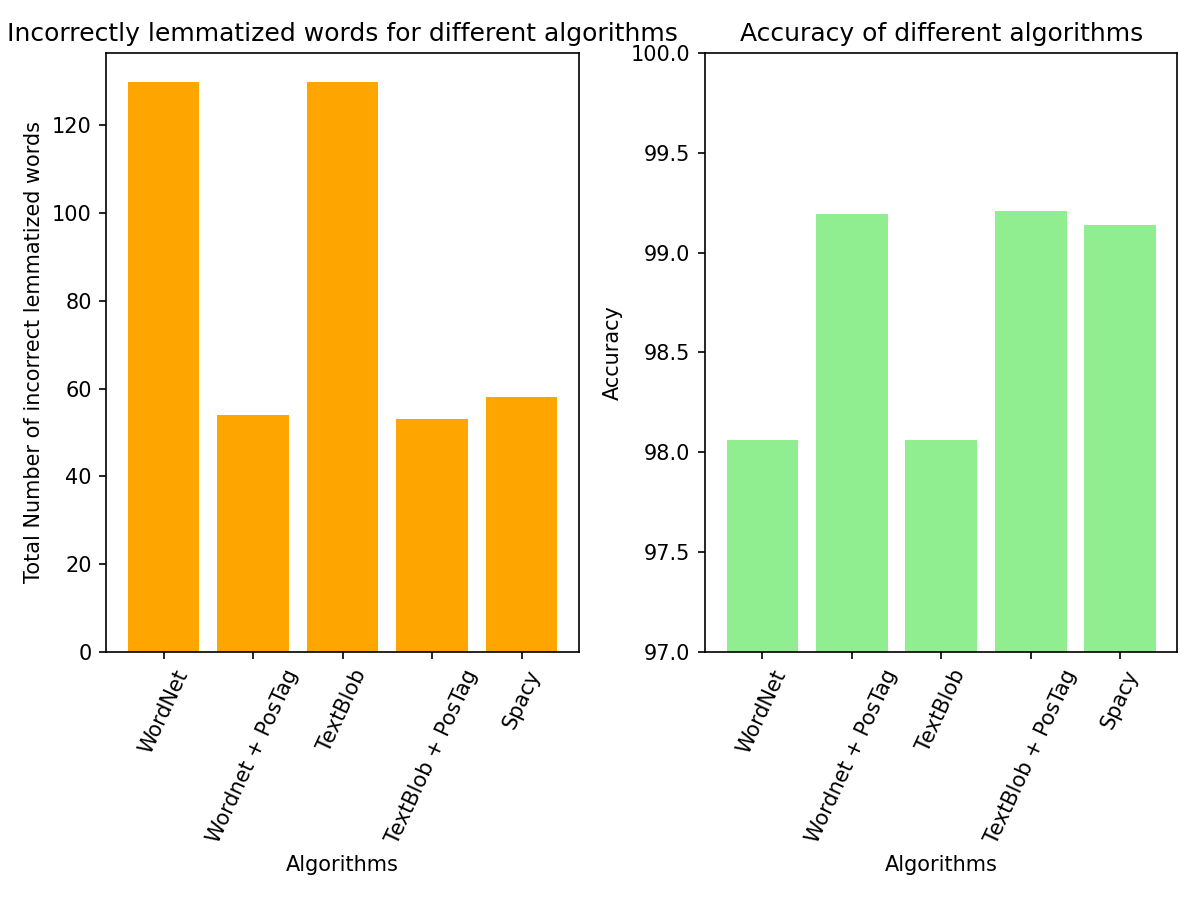

In [18]:
%matplotlib notebook

DiffList = [len(WNDiff), len(WNPOSDiff), len(TBDiff), len(TBPOSDiff), len(SCDiff)]
PercentList = [WNPercent, WNPOSPercent, TBPercent, TBPOSPercent, SCPercent]


x = list(range(5))
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (8,6))
ax1.bar(x, DiffList, color = 'orange')
ax1.set_xticks(x, labels= ['WordNet','Wordnet + PosTag','TextBlob','TextBlob + PosTag','Spacy'])
ax1.set_xticklabels(['WordNet','Wordnet + PosTag','TextBlob','TextBlob + PosTag','Spacy'], rotation = 65)
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Total Number of incorrect lemmatized words')
ax1.set_title('Incorrectly lemmatized words for different algorithms')

ax2.bar(x, PercentList, color = 'lightgreen')
ax2.set_ylim(97,100)
ax2.set_xticks(x, labels= ['WordNet','Wordnet + PosTag','TextBlob','TextBlob + PosTag','Spacy'])
ax2.set_xticklabels(['WordNet','Wordnet + PosTag','TextBlob','TextBlob + PosTag','Spacy'], rotation = 65)
ax2.set_xlabel('Algorithms')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy of different algorithms')
plt.tight_layout()
plt.show()

### Since WordNet (with Pos Tag) and TextBlob (with Pos Tag) perform better, we decided to move forward with WordNet (with Pos Tag) algorithm.

Using WordNet for performing lematization

In [11]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(words, pos_tags):
    return [lemmatizer.lemmatize(word, pos=wordnet_pos(tag)) for word, tag in zip(words, pos_tags)]

def wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

sentPos = [nltk.pos_tag(sent) for sent in data_processed_main]
dataLemma = [[lemmatizer.lemmatize(word, pos=wordnet_pos(tag)) for word, tag in pos_tags] for pos_tags in sentPos]
print(dataLemma[0])

['smartphones', 'become', 'integral', 'part', 'live', 'change', 'way', 'communicate', 'access', 'information', 'entertain', 'device', 'come', 'long', 'way', 'since', 'inception', 'first', 'smartphone', 'introduce', 'however', 'release', 'iphone', 'smartphones', 'become', 'widely', 'popular', 'spark', 'technological', 'revolution']


In [12]:
flattened = [val for sent in dataLemma for val in sent]
count = Counter(flattened)
top10 = count.most_common(10)
top10

[('smartphones', 13),
 ('also', 8),
 ('make', 6),
 ('become', 5),
 ('device', 5),
 ('way', 4),
 ('access', 4),
 ('world', 4),
 ('apps', 4),
 ('live', 3)]

<IPython.core.display.Javascript object>


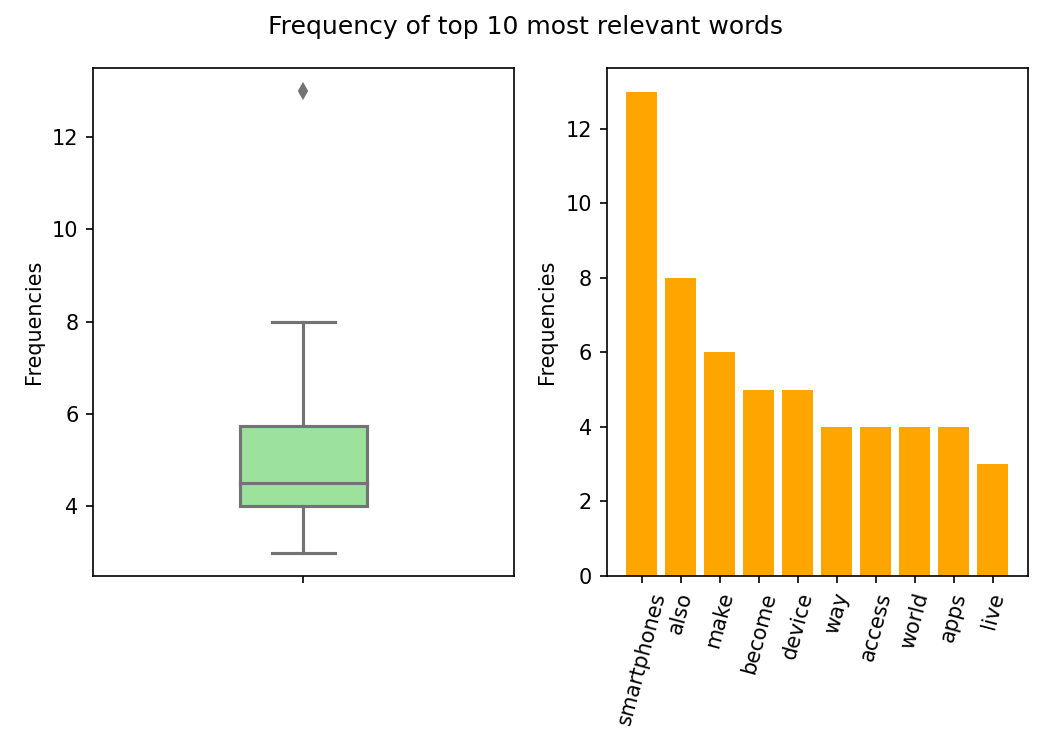

C:\Users\opedneka\AppData\Local\Temp\18\ipykernel_1228\3995410847.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(words,rotation=75)


In [13]:
%matplotlib notebook
freqs = [word[1] for word in top10]
words = [word[0] for word in top10]

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,5))

sns.boxplot(y=freqs,width = 0.3, color='lightgreen', ax=ax1)
ax1.set_ylabel('Frequencies') 

ax2.bar(words,freqs,color='orange')
ax2.set_xticklabels(words,rotation=75)
ax2.set_ylabel('Frequencies')

plt.suptitle('Frequency of top 10 most relevant words')
plt.tight_layout()
plt.show();

In [15]:
allWords = []
wordNum = []
sentNum = []
for snum,(sent) in enumerate(data_processed_main):
    allWords.extend(sent)
    sentNum.extend([snum+1]*len(sent))
    wordNum.extend(list(range(1,len(sent)+1)))
wordLoc = pd.DataFrame({'word': allWords, 'DocNum': sentNum, 'WordNum': wordNum})
wordLoc

,word,DocNum,WordNum
0,smartphones,1,1
1,become,1,2
2,integral,1,3
3,part,1,4
4,lives,1,5
...,...,...,...
224,see,7,18
225,smartphones,7,19
226,continue,7,20
227,shape,7,21


<IPython.core.display.Javascript object>


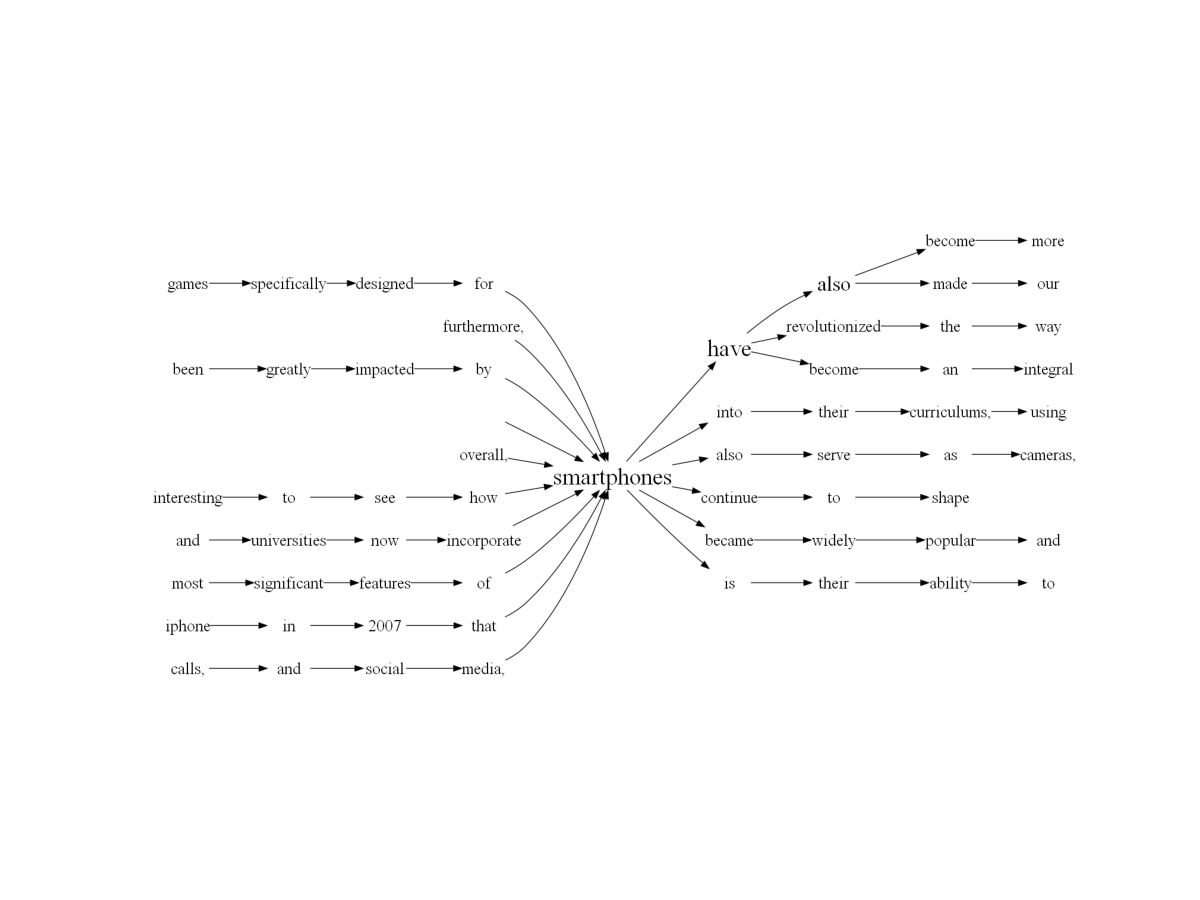

In [16]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(wordLoc['WordNum'], wordLoc['DocNum'],c=wordLoc['DocNum'],cmap='Spectral')

ax.set_xlabel('Words in sentences')
ax.set_ylabel('Paragraphs')
ax.set_title('Words across documents')

annot = ax.annotate("", xy=(0,0), xytext=(20,20), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    pos = scatter.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = wordLoc.iloc[ind["ind"][0]]['word']
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)
    annot.set_visible(True)

def on_click(event):
    sentences = [para.split('.') for para in lines]
    data = [line for sent in sentences for line in sent]
    cont, ind = scatter.contains(event)
    fig.clf()
    selectedWord = wordLoc.iloc[ind["ind"][0]]['word']
    g = wordtree.search_and_draw(corpus = data, keyword = selectedWord)
    g.render() # creates a file world.dv.png
    img = mpimg.imread('{}.gv.png'.format(selectedWord))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    
def on_hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = scatter.contains(event)
        if cont:
            update_annot(ind)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

            
fig.canvas.mpl_connect('button_press_event', on_click)
fig.canvas.mpl_connect('motion_notify_event', on_hover)

plt.show();

We can see now that the words we got are more relevant to the text data. Now lets plot the bar chart and box plot using seaborn library

### Write a Python program to generate WordCloud



Wordcloud gives us a brief idea about the occurance of various words in the text. The words occuring large number of times are shown bigger in the wordcloud and those occuring less number of times are shown smaller. It can give us an idea about the frequency of words across document. To implement this we use the WordCloud library present in Python. We pass it a single string consisting of words joined by whitespace from our preprocessed data

<IPython.core.display.Javascript object>


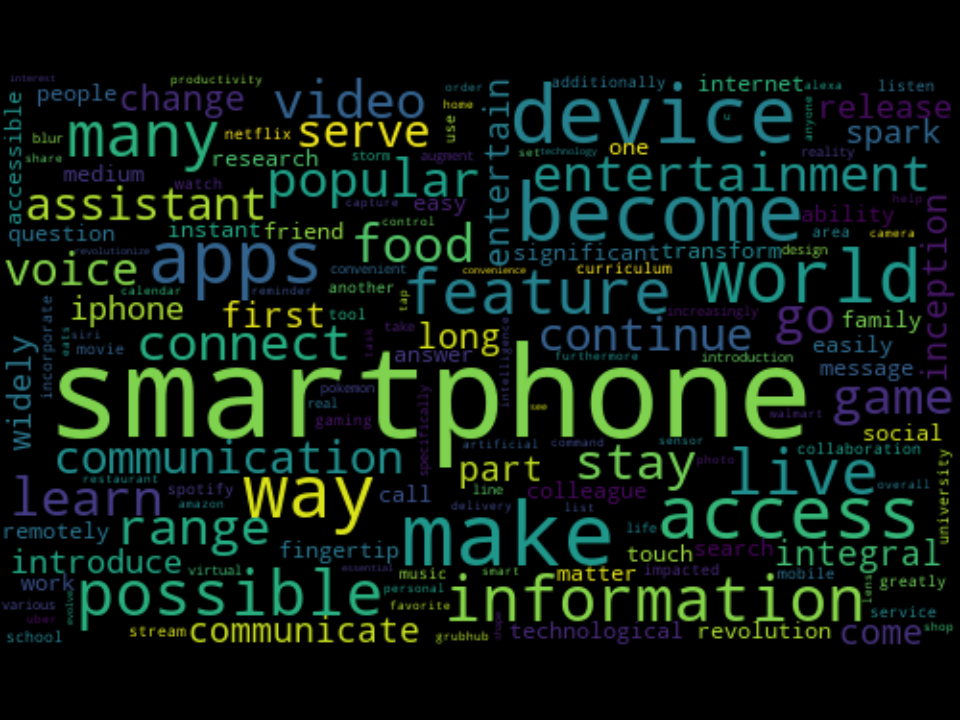

In [17]:
#%matplotlib inline
text = ' '.join(word for sent in dataLemma for word in sent)

wordcloud = WordCloud(
    width = 500,
    height = 300,
    background_color = 'black',
    stopwords = STOPWORDS).generate(text)
fig, ax = plt.subplots(
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

plt.show()
plt.tight_layout(pad=0)
plt.show()